# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

# Presentación final  
### Daniela Eugenia Treviño Martínez A01720758
### Mi base se datos se obtuvo de Kaggle, tiene la información sobre el Covid-19 en la población 

# Descripción de base de datos 
## Cuenta con 8 variables

### Variables numericas
* Total Cases: es una variable que representa el numero total de casos de Covid 19 que hay en cada región

* Total Deaths: es una variable que muestra el total de muertes causadas por Covid 19

* Total Recovered: es una variable que muestra el total de personas que se recuperaron de Covid 19

* Active Cases: representa a lso casos que estan activos actualmente de Covid


* New Recovered: es una variables que representa los casos de covid que acaban de recuperarse


* Serious,Critical : representa los casos de covid que estan en un estado critico 

### Variables categoricas 

* Continent : Es una variable que representa a los continentes en el mundo

* WHO Region: Es una variable que representa a las regiones en el mundo 




In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import linear_model


In [24]:
import seaborn as sns # For plotting
import pandas as pd
import matplotlib.pyplot as plt # For showing plots

# Load in the data set
df = pd.read_csv("worldometer_data.csv")
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


# 1. Pregunta de investigación 1
## ¿Que porcentaje de pruebas se han hecho en cada region?

In [31]:
df_continents = df.groupby('WHO Region', 
                           axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('WHO Region', 
                      axis=0
                     )))

df_continents.sort_values(['TotalCases'], 
                          ascending=False, 
                          axis=0, 
                          inplace=True
                         )
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
WHO Region,,,,,,,,,,,,,
Americas,1.018880e+09,10452852,7902.0,384637.0,899.0,6259733.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
Europe,9.277339e+08,3544086,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
South-EastAsia,1.997513e+09,2426899,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
EasternMediterranean,7.320077e+08,1605866,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
Africa,1.118461e+09,852026,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0


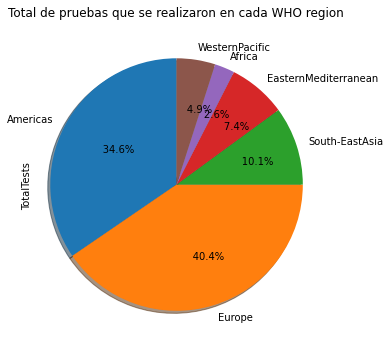

In [32]:
df_continents['TotalTests'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%10.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total de pruebas que se realizaron en cada WHO region')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Conclusion  
* Se puede observar que la region de Europa fue donde se hicieorn han hecho más  pruebas de Covid

# 2. Pregunta de investigación 2:
### ¿De los casos totales de covid cuantos se han recuperado??

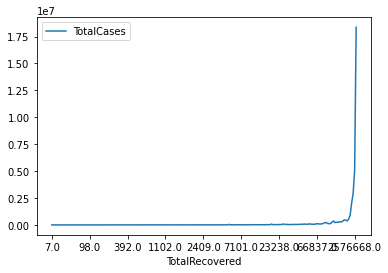

In [33]:
my_pivot = pd.pivot_table(df,
                        index = ['TotalRecovered'],
                        values = ['TotalCases'],
                        #aggfunc = ['std','sum','mean','median'],
                        aggfunc = 'sum',
                        margins = True
                         )
            
my_pivot.plot() 

## Conclusiones 
* Se puede observar que la gran mayoria de los casos de covid ya se recuperaron  

# 3. Pregunta de investigación 3:
### ¿Que continente tiene el mayor impacto en número de casos?


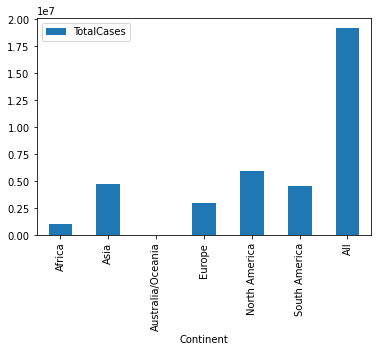

In [34]:
my_pivot = pd.pivot_table(df,
                        index = ['Continent'],
                        values = ['TotalCases'],
                        #aggfunc = ['std','sum','mean','median'],
                        aggfunc = 'sum',
                        margins = True
                         )
            
my_pivot.plot.bar()

## Conclusiones 
* Se puede observar que el continente con mas registros de covid en el mundo es Norte America. 

# . Pregunta 3 de investigacion: 
## ¿Cual es la relacion con los casos activos y los que estan criticos?

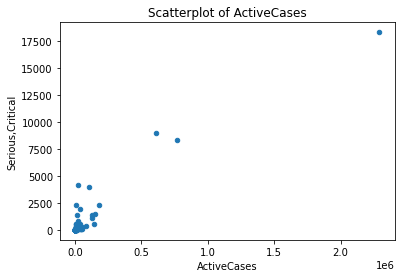

In [20]:
df.plot(kind='scatter', 
        x='ActiveCases', 
        y='Serious,Critical'
       )

plt.title('Scatterplot of ActiveCases')
plt.show()

## Conclusion
* No existe mucha relacion entre las variables de casos activos y serios/criticos

# 4. Pregunta 4 de investigación: 
## ¿Cual es el impacto de NewRecovered en ActiveCases? 

In [21]:
#y = b0 + b1*x1 + b2*x2 + ... 
# 'NewCases' =b0 + b1* 'ActiveCases'

modelA = sm.OLS.from_formula('NewCases~ActiveCases',data = df)
resultA = modelA.fit()
resultA.summary()


/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NewCases   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     14.02
Date:                Thu, 02 Dec 2021   Prob (F-statistic):             0.0645
Time:                        13:14:57   Log-Likelihood:                -33.134
No. Observations:                   4   AIC:                             70.27
Df Residuals:                       2   BIC:                             69.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -376.9196    924.608     -0.408      0.723   -4355.186    3601.347
ActiveCases     0.0590      0.016      3.744      0.064      -0.009       0.127
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.759
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.759
Skew:                          -0.996   Prob(JB):                        0.684
Kurtosis:                       2.236   Cond. No.                     8.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observaciones 
* R-cuadrado : 0.870; por lo tanto 87% de ActiveCases explicado por el modelo 
NewCases =b0 + b1*ActiveCases

* Df Model: 1

* b0:-376.9196
* b1:0.0590

* Si el valor de R cuadrado r> 0,7, este valor generalmente se considera un tamaño de efecto fuerte


### Modelo final seria: 
NewCases = -386.3038 + 0.0393*ActiveCases



In [14]:
print('El NewCases que tiene ActiveCases es:', -386.3038 + 0.0393*300000)

El NewCases que tiene ActiveCases es: 11403.6962


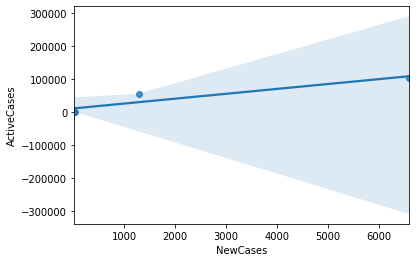

In [15]:
sns.regplot(x = 'NewCases',
            y = 'ActiveCases',
            data = df,
           )

## Conclusion
* Se puede observar que no existe tanta relacion entre los casos activos y los nuevos casos, sin embargo si hay casos activos hay posibilidad de que se registren nuevos casos 


# 5. Pregunta de investigación 5
## ¿Que porcentaje de pruebas se han hecho en cada region?

In [16]:
df_continents = df.groupby('WHO Region', 
                           axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df.groupby('WHO Region', 
                      axis=0
                     )))

df_continents.sort_values(['TotalCases'], 
                          ascending=False, 
                          axis=0, 
                          inplace=True
                         )
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
WHO Region,,,,,,,,,,,,,
Americas,1.018880e+09,10452852,7902.0,384637.0,899.0,6259733.0,5076.0,3808482.0,39973.0,146673.0,4932.00,92420577.0,1570567.0
Europe,9.277339e+08,3544086,0.0,215564.0,0.0,2047446.0,0.0,566295.0,6676.0,233379.0,9868.00,108184582.0,7382226.0
South-EastAsia,1.997513e+09,2426899,0.0,50624.0,0.0,1621081.0,0.0,755194.0,8958.0,13145.0,108.40,26922262.0,307222.0
EasternMediterranean,7.320077e+08,1605866,0.0,42376.0,0.0,1340094.0,0.0,223396.0,7982.0,133235.0,1098.00,19885783.0,1851579.0
Africa,1.118461e+09,852026,0.0,15538.0,0.0,604326.0,0.0,232162.0,1097.0,43191.0,679.28,6856722.0,596367.0


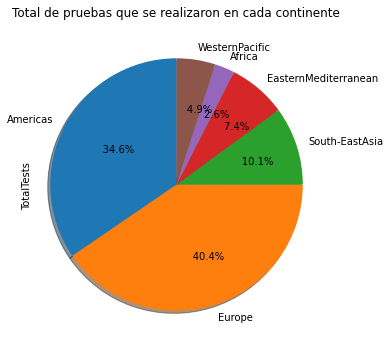

In [28]:
df_continents['TotalTests'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%10.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Total de pruebas que se realizaron en cada continente')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Conclusion  
* Se puede observar que la region de Europa fue donde se hicieorn han hecho más  pruebas de Covid

# 6. Pregunta de investigación 6: 
## ¿Cual ha sido el crecimiento/decrecimiento de numero de muertes nuevas durante la pandemia?

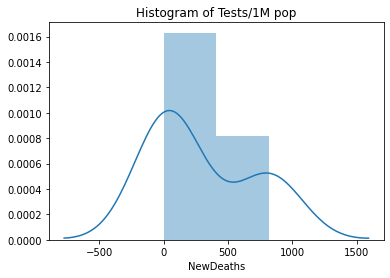

In [18]:
sns.distplot(df["NewDeaths"], 
             kde = True).set_title("Histogram of Tests/1M pop")

# kernel density estimation  KDE

plt.show()

# Conclusion
* Se puede observar que el numero de muertes esta decreciendo 


# Limitaciones

* Una de las limitaciones que me encontré, es que hay muchas base de datos que no están actualizadas, por lo que no darían información relevante. 

* Faltan datos para poder hacer un analisis mas completo, por ejemplo los días, meses, años en los que empezó la pandemia 


## Hallazgos interesantes
* El continente donde se realizaron más pruebas de covid fue Europa 

* Se ha reducido el registro de muertes por covid 

* El continente con menor casos de covid es Australia, también es donde se han hecho menor cantidad de pruebas 